<a href="https://colab.research.google.com/github/tomersk/learn-python/blob/main/06_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 6.8 NDVI
Normalized Difference Vegetation Index (NDVI) is a index to analyse variation in the vegetation. The formula to compute NDVI is as:

$NDVI = \frac{NIR−RED}{NIR+RED} $
  
We begin with importing libraries. Then we read the data that is in tiff format. To compute NDVI, we need data for NIR (band4) and RED (band3).

In [2]:
# import the required library
from osgeo import gdal
from osgeo.gdalconst import *
import matplotlib.pyplot as plt
from google.colab import drive

#drive.mount('/content/gdrive')

# read the banda 3 raster data
driver = gdal.GetDriverByName('GTiff')
file_name = "/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/band3.tif"
dataset = gdal.Open(file_name, GA_ReadOnly)
geotransform = dataset.GetGeoTransform()
projection = dataset.GetProjection()
band3 = dataset.GetRasterBand(1).ReadAsArray()
dataset = None

# read the band 4 raster data
file_name = "/content/gdrive/My Drive/Colab Notebooks/LearnPython/data/band4.tif"
dataset = gdal.Open(file_name, GA_ReadOnly)
band4 = dataset.GetRasterBand(1).ReadAsArray()
dataset = None

Apart from the data, we are also retrieving the geotransform and projection information. Let us print them one by one.

In [3]:
print(geotransform)

(76.5, 0.001, 0.0, 11.85, 0.0, -0.001)


The first entry in this tell us, that latitude and longitude for the north-west corner are 11.85 and 76.5 respectively. Resolution of data is 0.001 in both x and y direction, and the image has no rotation. Let us print now, projection information.

In [4]:
print(projection)

GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]]


This tells us that the datum of data is WGS84, and our data is in geographic co-ordinates (latitude and longitude). More details on the projections and their parameters can be found at http://spatialreference.org.
We can check the data type using dtype attributes. 

In [5]:
print(band3.dtype)

uint8


Now we compute NDVI, and plot the result using matshow. In matshow, we are also specifying vmin and vmax to control the extent of colorbar.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


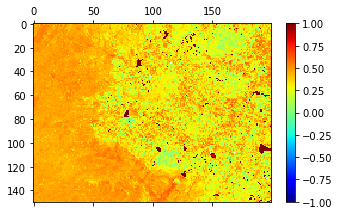

In [6]:
ndvi = (band4-band3)/(band4+band3)

plt.matshow(ndvi,cmap=plt.cm.jet, vmin=-1, vmax=1)
plt.colorbar(shrink=0.8)
plt.show()